<a href="https://colab.research.google.com/github/Subhamtr01/DL_NLP/blob/main/Subham_03519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = "/content/sample_data/"

In [ ]:
data = pd.read_csv(path + "california_housing_train.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data.shape

(17000, 9)

In [ ]:
data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
y = data.pop('median_house_value')

In [ ]:
data.shape

(17000, 8)

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [ ]:
X_train.shape
X_test.shape

(12750, 8)

(4250, 8)

In [ ]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add( tf.keras.layers.Input(shape = (8,) ))

In [ ]:
model.add(tf.keras.layers.Dense(40, activation = 'relu'))

In [ ]:
model.add( tf.keras.layers.Dense(1, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [ ]:
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [ ]:
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                360       
                                                                 
 dense_13 (Dense)            (None, 1)                 41        
                                                                 
 dropout_6 (Dropout)         (None, 1)                 0         
                                                                 
 dense_14 (Dense)            (None, 20)                40        
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 462
Trainable params: 462
Non-trainable 

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
from keras.utils import plot_model

In [ ]:
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
)

In [ ]:
history = model.fit(X_train,y_train,
                    epochs = 70,
                    validation_data = (X_test, y_test))

Epoch 1/70
399/399 [==============================] - 3s 5ms/step - loss: -40968.1250 - acc: 0.0000e+00 - val_loss: -82412.7578 - val_acc: 0.0000e+00
Epoch 2/70
399/399 [==============================] - 1s 3ms/step - loss: -123242.6484 - acc: 0.0000e+00 - val_loss: -164671.1250 - val_acc: 0.0000e+00
Epoch 3/70
399/399 [==============================] - 1s 3ms/step - loss: -205404.1250 - acc: 0.0000e+00 - val_loss: -247048.9531 - val_acc: 0.0000e+00
Epoch 4/70
399/399 [==============================] - 1s 3ms/step - loss: -287576.3750 - acc: 0.0000e+00 - val_loss: -329331.7500 - val_acc: 0.0000e+00
Epoch 5/70
399/399 [==============================] - 1s 2ms/step - loss: -369774.9688 - acc: 0.0000e+00 - val_loss: -411668.5312 - val_acc: 0.0000e+00
Epoch 6/70
399/399 [==============================] - 1s 4ms/step - loss: -452067.5938 - acc: 0.0000e+00 - val_loss: -494083.4688 - val_acc: 0.0000e+00
Epoch 7/70
399/399 [==============================] - 2s 4ms/step - loss: -534385.8750 - a

In [ ]:
# 7.1
model.evaluate(X_test,y_test)

133/133 [==============================] - 0s 2ms/step - loss: -5767348.5000 - acc: 0.0000e+00


[-5767348.5, 0.0]

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

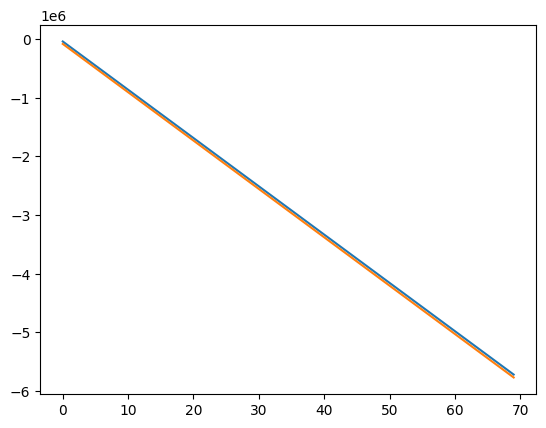

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

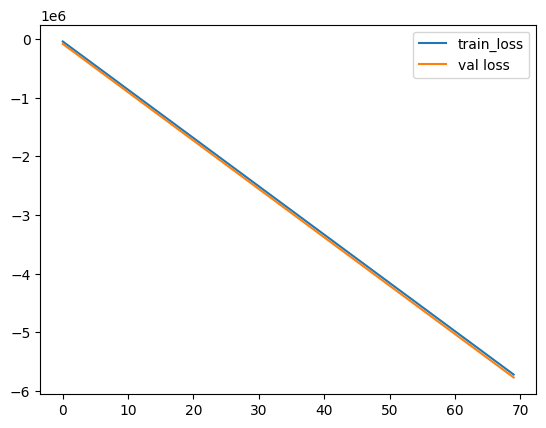

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

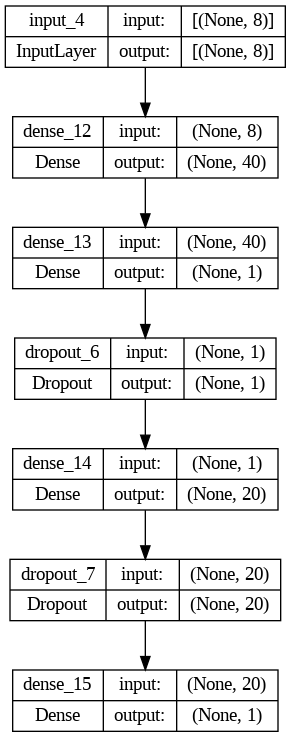

In [105]:
plot_model(model, show_shapes=True)